Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
df = pd.read_csv('../datasets/height-weight.csv')
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


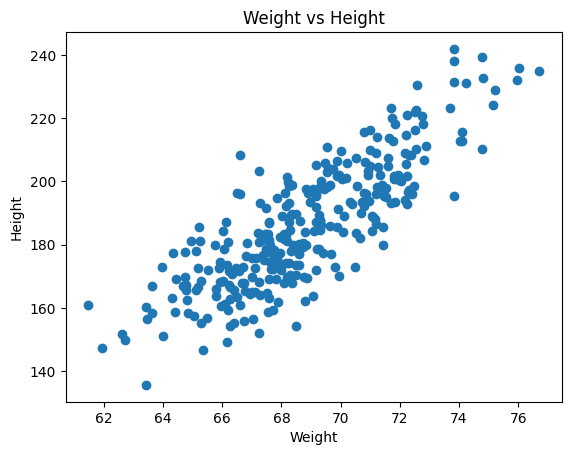

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')
plt.show()

In [4]:
## Divide the dataset into independent and dependent variables
X = df[['Weight']] # Independent feature
y = df[['Height']] # Dependent feature

In [5]:
X, y

(        Weight
 0    73.847017
 1    68.781904
 2    74.110105
 3    71.730978
 4    69.881796
 ..         ...
 295  67.852131
 296  67.549069
 297  74.767447
 298  71.418946
 299  67.120344
 
 [300 rows x 1 columns],
          Height
 0    241.893563
 1    162.310473
 2    212.740856
 3    220.042470
 4    206.349801
 ..          ...
 295  194.744522
 296  183.266533
 297  210.369909
 298  198.042484
 299  172.664090
 
 [300 rows x 1 columns])

In [10]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [9]:
X.shape

(300, 1)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 1), (60, 1), (240, 1), (60, 1))

In [12]:
## Standardize the dataset over independent train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

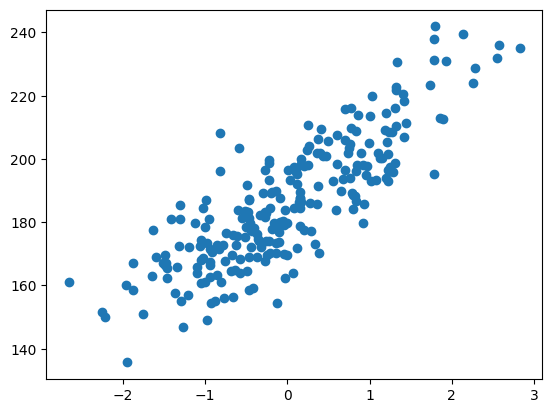

In [14]:
plt.scatter(X_train, y_train)

In [15]:
# Train the model Simple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
print("The slope or coefficient of weight is: ", model.coef_)
print("The intercept of the line is: ", model.intercept_)

The slope or coefficient of weight is:  [[16.75884807]]
The intercept of the line is:  [186.32650958]


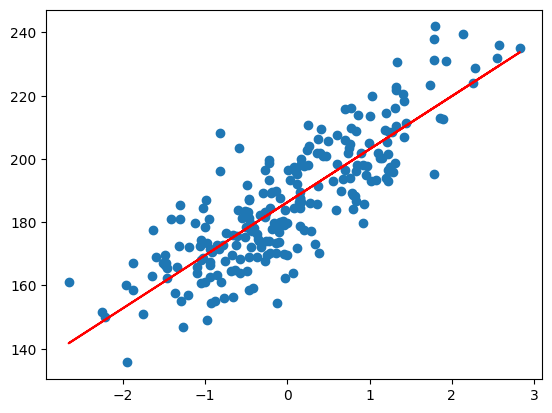

In [17]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), 'r')

In [19]:
y_pred_test = model.predict(X_test)

In [22]:
y_pred_test, y_test

(array([[159.46080926],
        [183.21758961],
        [198.29286069],
        [153.6954315 ],
        [202.10836624],
        [162.14278668],
        [176.61622009],
        [178.76400106],
        [176.61435393],
        [173.01126809],
        [180.80725433],
        [197.87267771],
        [203.91180583],
        [193.82998272],
        [171.47843166],
        [173.80066135],
        [164.18672117],
        [195.15788529],
        [170.27165928],
        [163.72869041],
        [172.14476386],
        [188.3489793 ],
        [202.89594758],
        [179.46212498],
        [193.6555303 ],
        [164.64532882],
        [186.12596489],
        [180.23110408],
        [144.52446968],
        [217.97589447],
        [156.8214891 ],
        [176.67827877],
        [188.24818605],
        [180.47901001],
        [222.14622804],
        [203.49479053],
        [183.22769041],
        [204.15677535],
        [182.64405615],
        [178.6804748 ],
        [161.39498404],
        [204.119

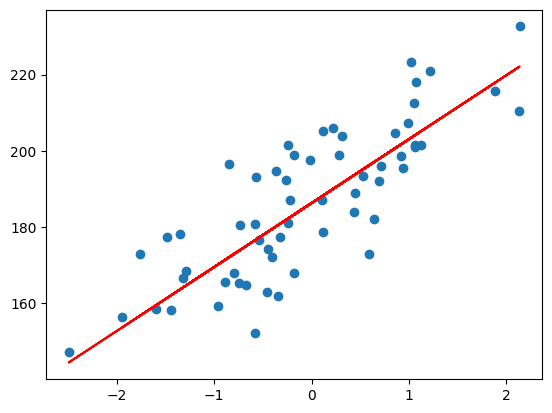

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), 'r')
plt.show()

Performance Metrics

 MSE, RMSE, MAE
 
  R2 Score, Adjusted R2 Score

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  127.32672937047964
Mean Absolute Error:  9.269094509971893
Root Mean Squared Error:  11.283914629705404


In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
print("R2 Score: ", score * 100, '%')

R2 Score:  66.1844826421359 %


In [29]:
# Display Adjusted R2 Score
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score: ", adjusted_r2 * 100, '%')

Adjusted R2 Score:  65.6014564807934 %


In [30]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
## New data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

array([[4.01215574]])

In [49]:
print('The height of the person with weight 80 is: ', model.predict(scaled_weight))

The height of the person with weight 80 is:  [[253.56561802]]


Assumptions of Linear Regressionss

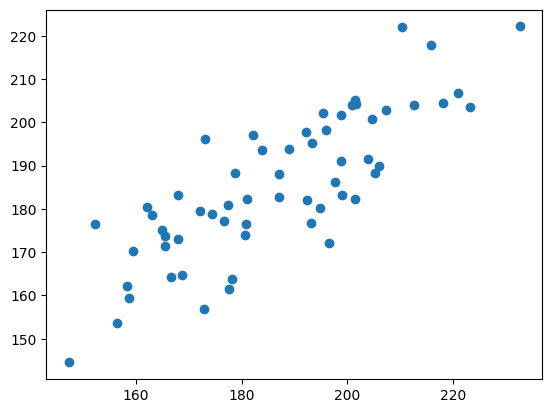

In [50]:
## Plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)

In [51]:
# Residuals
residuals = y_test - y_pred_test
print(residuals)

        Height
203  -0.881412
266  15.703390
152  -2.355846
9     2.704245
233  -6.715749
226  -3.801344
196   4.163560
109  -4.399819
5   -24.402198
175  -4.997238
237  -3.459475
57   -5.747830
218   8.714296
45   -4.907680
182  -5.909933
221  -8.369419
289   2.520652
211  -1.811325
148 -10.881336
165  14.406255
78   24.305096
113  -9.663433
249   4.354529
250  -7.309353
104  -9.716673
42    3.972417
281  11.611940
295  14.513418
157   2.739217
238  -2.216191
17   16.061981
164  16.539394
33   16.935435
24  -18.472358
215  10.489175
119  19.804545
7   -15.256580
90   -2.536109
46    4.416496
73  -15.572473
93   16.154279
76   -3.198573
286 -23.244517
60   -2.908374
77   14.150701
63  -10.124822
234  -0.683249
229  13.801392
111  19.213073
231  -3.551539
180  -1.158708
144  15.973342
239  -1.151363
75    3.894037
297 -11.607722
278   7.756536
97    6.605828
92  -14.941686
192  12.335404
25   10.350712


<Axes: ylabel='Count'>

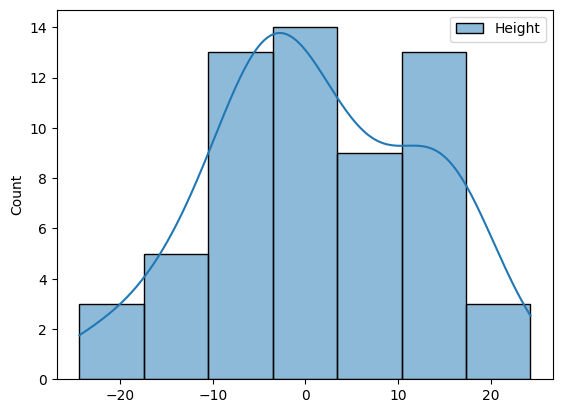

In [56]:
# Plot the residuals
import seaborn as sns
sns.histplot(residuals, kde = True)

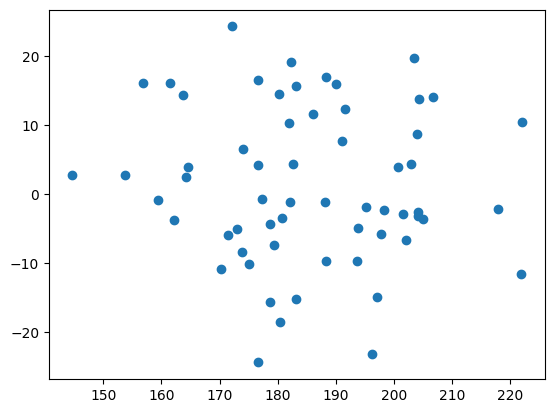

In [53]:
## Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred_test, residuals)